In [12]:
import imageio
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
reader = imageio.get_reader("../ct.jpg")
frames = list(reader)

# Get the first frame (or choose any frame)
frame = frames[0]
image = cv2.cvtColor(frame, cv2.COLOR_RGBA2GRAY)
print("Image dimensions:", image.shape)

Image dimensions: (225, 225)


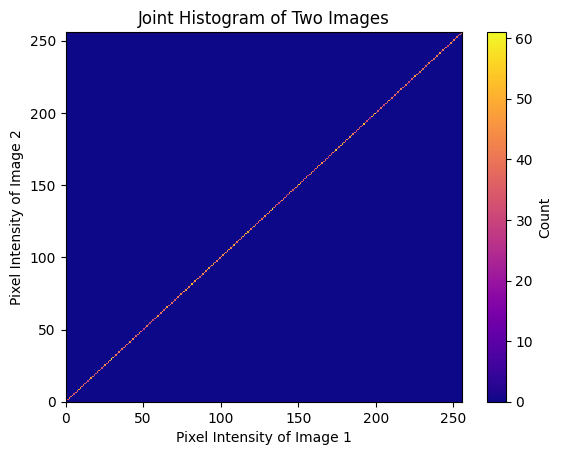

In [14]:
np.random.seed(0)
image1 = np.random.randint(0, 256, (100, 100), dtype=np.uint8)
image2 = np.random.randint(0, 256, (100, 100), dtype=np.uint8)
pixels_image1 = image1.flatten()
pixels_image2 = image1.flatten()

# Plot the joint histogram
plt.hist2d(pixels_image1, pixels_image2, bins=(256, 256), range=((0, 256), (0, 256)), cmap='plasma')
plt.colorbar(label='Count')
plt.xlabel('Pixel Intensity of Image 1')
plt.ylabel('Pixel Intensity of Image 2')
plt.title('Joint Histogram of Two Images')
plt.show()

In [15]:
def calculate_joint_entropy(image1, image2, num_bins=256):
    # Create a joint histogram
    hist_2d, _, _ = np.histogram2d(image1.flatten(), image2.flatten(), bins=num_bins, range=[[0, num_bins], [0, num_bins]])
    
    # Convert histogram to PMF (Probability Mass Function)
    pmf_2d = hist_2d / np.sum(hist_2d)
    
    # Calculate the Joint Entropy
    joint_entropy = -np.sum(pmf_2d * np.log10(pmf_2d + np.finfo(float).eps))  # added epsilon to avoid log(0)
    
    return joint_entropy

In [16]:
print(calculate_joint_entropy(image1, image1))

2.402619058653943


In [17]:
p = np.full(20, 1/20)
entropy = -np.sum(p * np.log10(p))

print("The created array: ", p)
print("Calculated Entropy: ", entropy)

The created array:  [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
Calculated Entropy:  1.301029995663981


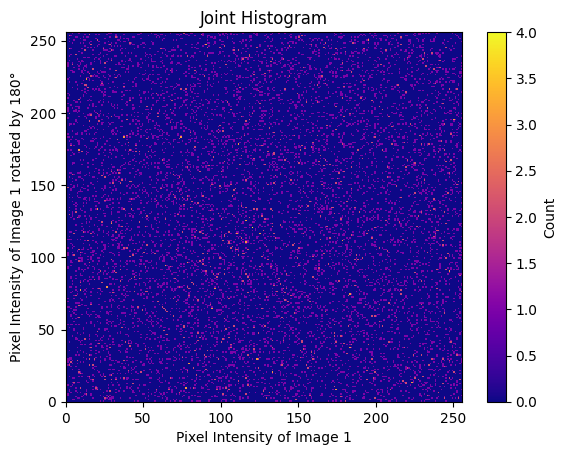

In [20]:
image3 = np.rot90(image1, k=2)
# Plot the joint histogram
plt.hist2d(image1.flatten(), image3.flatten(), bins=(256, 256), range=((0, 256), (0, 256)), cmap='plasma')
plt.colorbar(label='Count')
plt.xlabel('Pixel Intensity of Image 1')
plt.ylabel('Pixel Intensity of Image 1 rotated by 180°')
plt.title('Joint Histogram')
plt.show()

In [21]:
calculate_joint_entropy(image1, image3)

3.955488301285921